In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
sensor_file = "./data/sensor_data.csv"
quality_file = "./data/quality_control_data.csv"
# names = ['weight', 'humidity', 'temperature', 'quality']
sensor_data = pandas.read_csv(sensor_file)
quality_data = pandas.read_csv(quality_file)

In [4]:
sensor_data.head(10)

,weight,humidity,temperature,prod_id
0,1030.871118,29.687881,71.995808,1
1,1044.961148,28.862453,68.468664,2
2,972.710479,37.951588,65.121344,3
3,1010.182509,25.076383,67.821336,4
4,970.039236,27.137886,72.931800,5
5,990.154359,32.422428,71.406207,6
6,965.660243,42.603619,65.876158,7
7,969.221212,31.655071,74.430054,8
8,976.495532,26.499721,69.866121,9
9,974.993517,38.644055,69.891709,10


In [5]:
quality_data.head(10)

,prod_id,quality
0,1,good
1,2,good
2,3,good
3,4,good
4,5,good
5,6,good
6,7,poor
7,8,good
8,9,good
9,10,good


In [6]:
rawdataset = sensor_data.merge(quality_data, on="prod_id")

In [7]:
rawdataset.head(5)

,weight,humidity,temperature,prod_id,quality
0,1030.871118,29.687881,71.995808,1,good
1,1044.961148,28.862453,68.468664,2,good
2,972.710479,37.951588,65.121344,3,good
3,1010.182509,25.076383,67.821336,4,good
4,970.039236,27.137886,72.931800,5,good


In [8]:
dataset = rawdataset.drop(columns='prod_id')
dataset.head(10)

,weight,humidity,temperature,quality
0,1030.871118,29.687881,71.995808,good
1,1044.961148,28.862453,68.468664,good
2,972.710479,37.951588,65.121344,good
3,1010.182509,25.076383,67.821336,good
4,970.039236,27.137886,72.931800,good
5,990.154359,32.422428,71.406207,good
6,965.660243,42.603619,65.876158,poor
7,969.221212,31.655071,74.430054,good
8,976.495532,26.499721,69.866121,good
9,974.993517,38.644055,69.891709,good


In [9]:
# shape
print(dataset.shape)

(3000, 4)


In [10]:
# descriptions
print(dataset.describe())

            weight     humidity  temperature
count  3000.000000  3000.000000  3000.000000
mean    999.940363    34.863581    69.962969
std      28.765904     5.755869     2.857898
min     950.017007    25.008023    65.000514
25%     975.552942    29.783650    67.522238
50%     998.875197    34.825848    69.890808
75%    1025.649219    39.887405    72.414522
max    1049.954013    44.986735    74.999312


In [11]:
# quality distribution
print(dataset.groupby('quality').size())

quality
good    2907
poor      93
dtype: int64


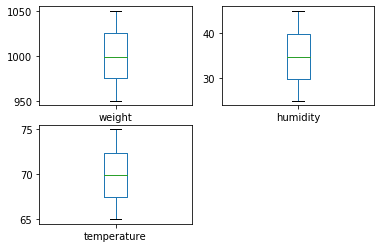

In [12]:
# box and whisker plots to show data distribution
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

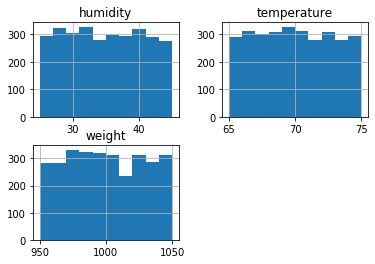

In [13]:
# check the histograms
dataset.hist()
plt.show()

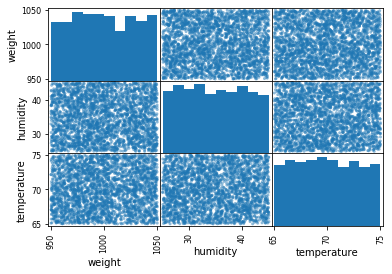

In [14]:
# scatter plot matrix - anything useful here?
scatter_matrix(dataset)
plt.show()

In [16]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
validation_size = 0.20
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [17]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.976667 (0.008375)
LDA: 0.973750 (0.007229)
KNN: 0.992083 (0.005417)
CART: 0.998750 (0.002668)
NB: 0.994167 (0.003333)
SVM: 0.985417 (0.005966)


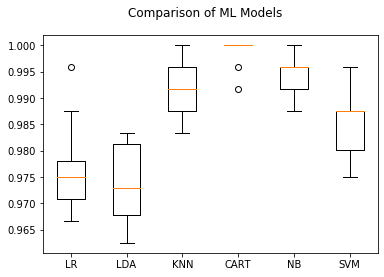

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comparison of ML Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# Make predictions on validation dataset
#knn = KNeighborsClassifier()
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9983333333333333
[[581   0]
 [  1  18]]
              precision    recall  f1-score   support

        good       1.00      1.00      1.00       581
        poor       1.00      0.95      0.97        19

    accuracy                           1.00       600
   macro avg       1.00      0.97      0.99       600
weighted avg       1.00      1.00      1.00       600



# Now test some values of your own

In [22]:
testWeight = 1200
testHumidity = 60
testTemperature = 65
testPrediction = CART.predict([[testWeight,testHumidity,testTemperature]])
print(testPrediction)

['good']
